In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("datasets/emissions.csv")

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

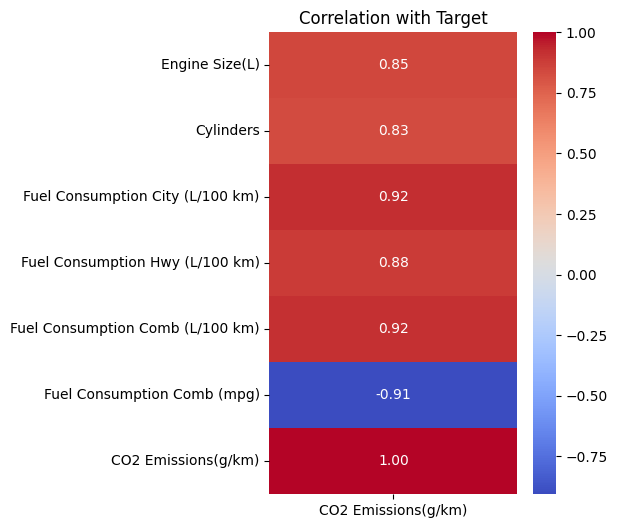

In [5]:
corr = df.corr(numeric_only=True)[["CO2 Emissions(g/km)"]]

plt.figure(figsize=(4,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation with Target", fontsize=12)
plt.show()

In [6]:
sdf = df[["CO2 Emissions(g/km)", "Engine Size(L)"]]

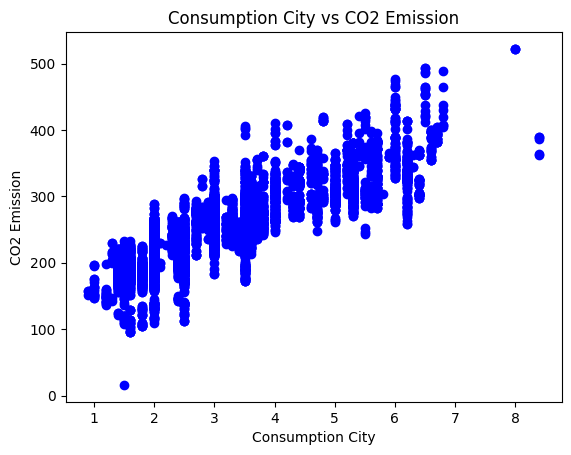

In [7]:
plt.scatter(sdf["Engine Size(L)"], sdf["CO2 Emissions(g/km)"], color="b")
plt.xlabel("Consumption City")
plt.ylabel("CO2 Emission")
plt.title("Consumption City vs CO2 Emission")
plt.show()

In [8]:
before = sdf.count()

z = zscore(sdf[["Engine Size(L)", "CO2 Emissions(g/km)"]])
sdf = sdf[(np.abs(z) <= 3).all(axis=1)]

print("data removed:")
print(f"{before - sdf.count()}")

data removed:
CO2 Emissions(g/km)    51
Engine Size(L)         51
dtype: int64


In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    sdf["Engine Size(L)"], 
    sdf["CO2 Emissions(g/km)"], 
    test_size=0.2,
    train_size=0.8,
    random_state=42
    )

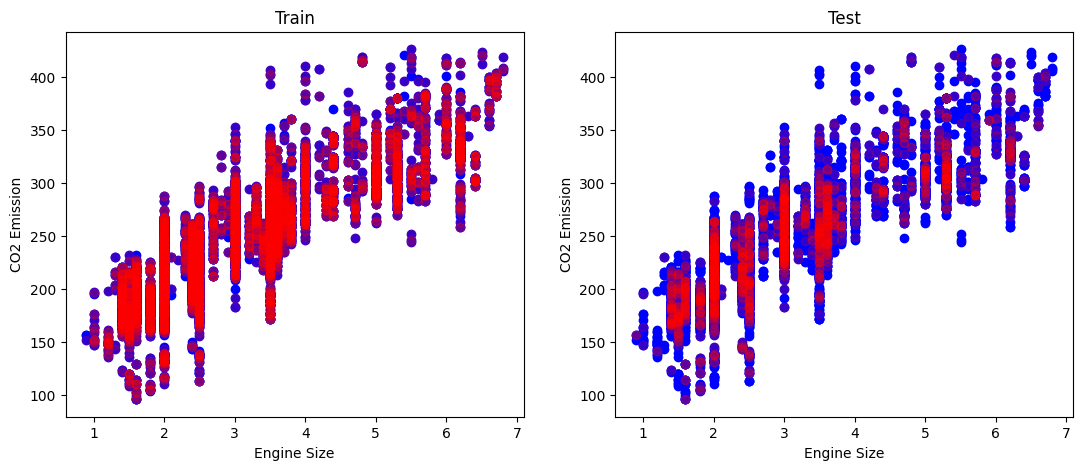

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.scatter(sdf["Engine Size(L)"], sdf["CO2 Emissions(g/km)"], color="b")
ax1.scatter(x_train, y_train, color="r", alpha=0.2)
ax1.set_xlabel("Engine Size")
ax1.set_ylabel("CO2 Emission")
ax1.set_title("Train")

ax2.scatter(sdf["Engine Size(L)"], sdf["CO2 Emissions(g/km)"], color="b")
ax2.scatter(x_test, y_test, color="r", alpha=0.2)
ax2.set_xlabel("Engine Size")
ax2.set_ylabel("CO2 Emission")
ax2.set_title("Test")

plt.show()

In [11]:
model = LinearRegression()
model.fit(x_train.to_frame(), y_train)

coef = model.coef_[0]
intercept = model.intercept_

print(f"Coef: {coef}\nIntercept: {intercept}")

Coef: 35.79760441788721
Intercept: 136.7988893383022


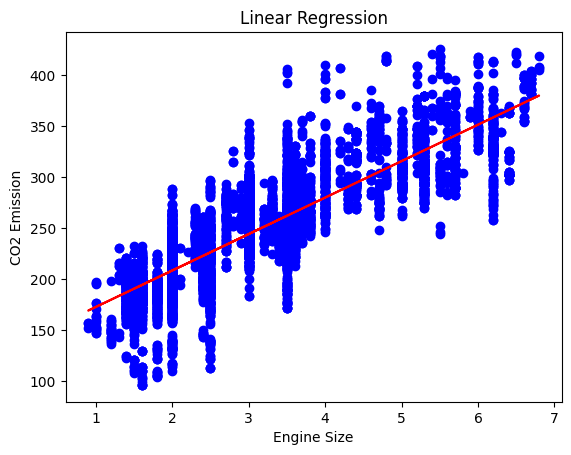

In [12]:
plt.scatter(sdf["Engine Size(L)"], sdf["CO2 Emissions(g/km)"], color="b")
plt.plot(x_train, coef * x_train + intercept, color="r")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.title("Linear Regression")
plt.show()

In [13]:
y_pred = model.predict(x_test.to_frame())

In [14]:
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"MSE: {MSE:.3f}")
print(f"MAE: {MAE:.3f}")
print(f"R2: {R2:.3f}")

MSE: 941.949
MAE: 23.318
R2: 0.714


In [15]:
r2_train = r2_score(y_train, model.predict(x_train.to_frame())) 
r2_test = R2

print(f"Train: {r2_train}")
print(f"Test: {r2_test}")
print(f"Diffrence: {r2_train - r2_test}")

Train: 0.718240187184958
Test: 0.7136773623964708
Diffrence: 0.00456282478848713


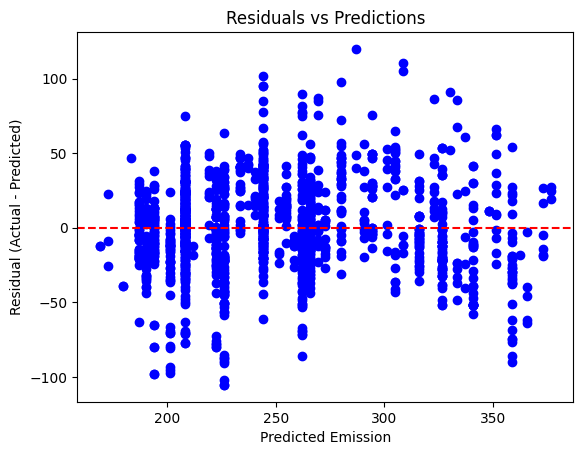

In [16]:
residual = y_test - y_pred

plt.scatter(y_pred, residual, color="b")
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicted Emission")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predictions")
plt.show()